# AIPI 590 - XAI | Assignment #8
### Hongxuan Li

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1GBXieesTR8Gc4Mr3r_AjkcBluvJyTWlR?usp=sharing)

#### References

- MTEB Model: https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
- PCA: https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html
- T-SNE: https://scikit-learn.org/1.5/modules/generated/sklearn.manifold.TSNE.html
- UMAP: https://umap-learn.readthedocs.io/en/latest/
- Dataset: https://scikit-learn.org/dev/modules/generated/sklearn.datasets.fetch_20newsgroups.html

In [1]:
# import os

# # Remove Colab default sample_data
# !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = "/content/AIPI590-XAI" # Change to your repo name
# git_path = 'https://github.com/h0ngxuanli/AIPI590-XAI.git' #Change to your path
# !git clone "{git_path}"


# # Install dependencies from requirements.txt file
# !pip install -r "{os.path.join(repo_name,'assignment8/requirements.txt')}" #Add if using requirements.txt

# # Change working directory to location of notebook
# notebook_dir = 'assignment8/'
# path_to_notebook = os.path.join(repo_name,notebook_dir)
# %cd "{path_to_notebook}"
# %ls


# Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer


# Dataset

In [3]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

# sample a subset
num_samples = 2000
texts = newsgroups.data[:num_samples]
labels = newsgroups.target[:num_samples]
label_names = newsgroups.target_names

# Generate Embedding

In [4]:
# Load the embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(texts, show_progress_bar=True)


/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

# Dimension Reduction Method

In [5]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(embeddings)

# UMAP
umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(embeddings)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# Visualization Comparsion

- t-SNE shows best clustering pattern, where samples from same classes are clustered and from different classes are dispersed.
- UMAP also shows distinguishable clustering pattern. However, the boudary between different classes is not clear as t-SNE
- PCA shows not clustering pattern, which shows that PCA fails to handle non-linear pattern in the embeddings.

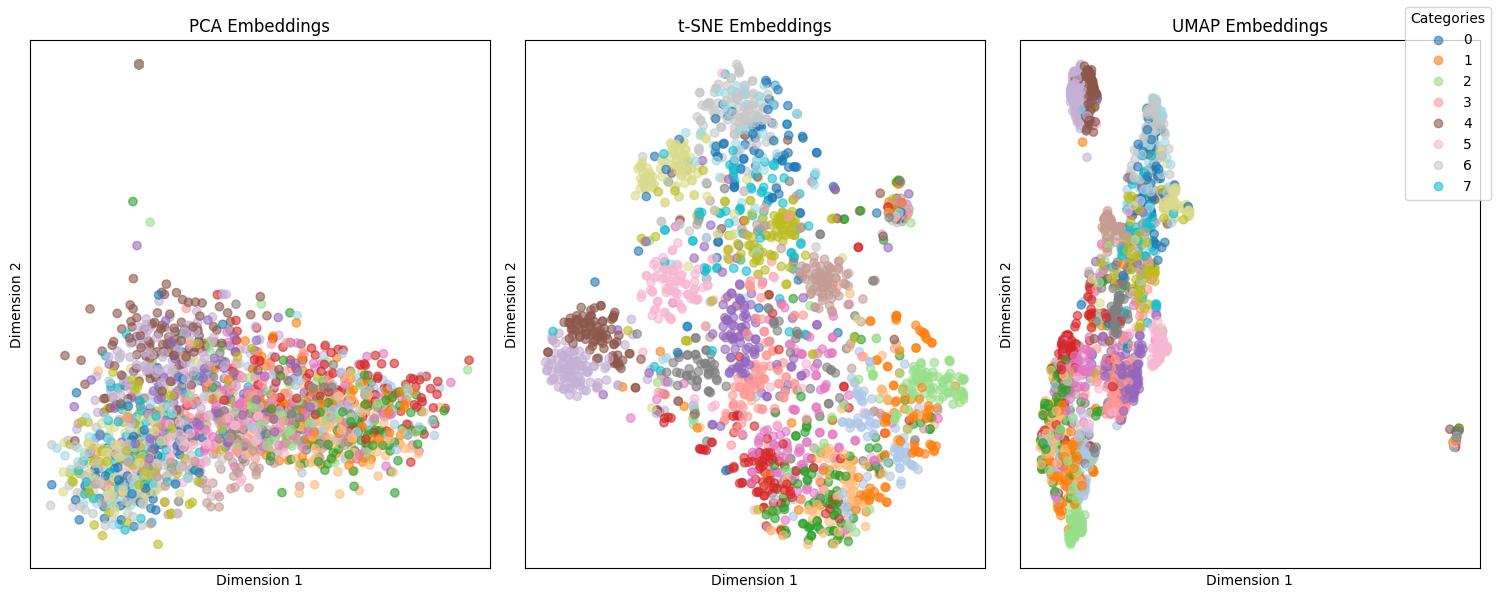

In [9]:

# Plot embeddings
def plot_embeddings_subplots(pca_result, tsne_result, umap_result, labels):

    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    embeddings_list = [pca_result, tsne_result, umap_result]

    titles = ['PCA Embeddings', 't-SNE Embeddings', 'UMAP Embeddings']

    for ax, embeddings_2d, title in zip(axes, embeddings_list, titles):
        scatter = ax.scatter(
            embeddings_2d[:, 0], embeddings_2d[:, 1],
            c=labels,
            cmap='tab20',
            alpha=0.6
        )
        ax.set_title(title)
        ax.set_xlabel('Dimension 1')
        ax.set_ylabel('Dimension 2')
        ax.set_xticks([])
        ax.set_yticks([])

    # Create a legend
    handles, _ = scatter.legend_elements(prop="colors")
    legend_labels = np.unique(labels)
    fig.legend(
        handles, legend_labels, loc='upper right', title='Categories',
        # bbox_to_anchor=(1.15, 0.9)
    )

    plt.tight_layout()
    plt.show()

# Call the updated function
plot_embeddings_subplots(pca_result, tsne_result, umap_result, labels)



# Silhouette Score Comparsion
- t-SNE achieves the highest Silhouette Score than PCA and UMAP, which shows its superior clustering performance

In [7]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores
pca_silhouette = silhouette_score(pca_result, labels)
tsne_silhouette = silhouette_score(tsne_result, labels)
umap_silhouette = silhouette_score(umap_result, labels)

print(f"PCA Silhouette Score: {pca_silhouette:.3f}")
print(f"t-SNE Silhouette Score: {tsne_silhouette:.3f}")
print(f"UMAP Silhouette Score: {umap_silhouette:.3f}")


PCA Silhouette Score: -0.180
t-SNE Silhouette Score: 0.000
UMAP Silhouette Score: -0.040
